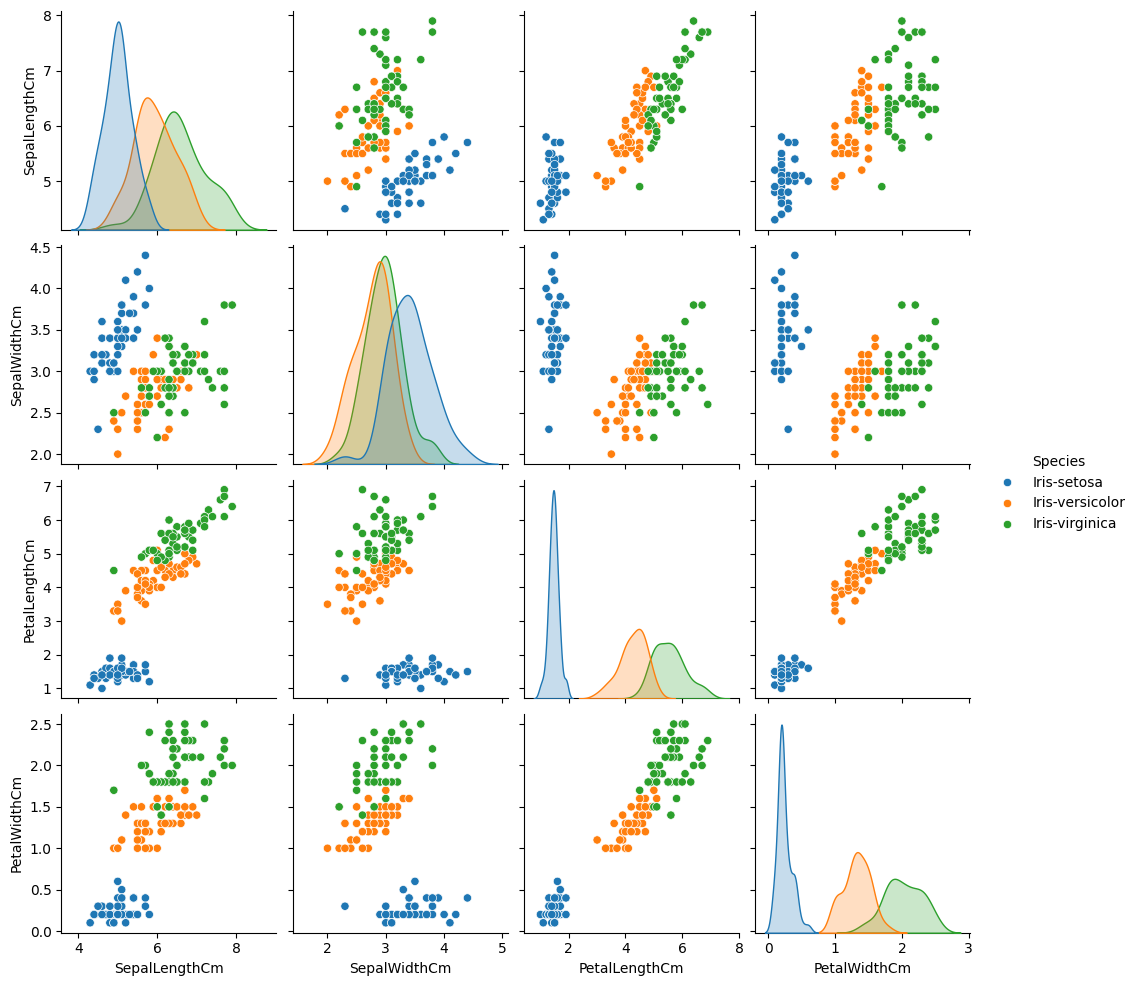

In [6]:
import metrics
import numpy as np
import pandas as pd
import skfuzzy as fuzz
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Load the Iris dataset
iris = pd.read_csv("./Iris.csv").drop(['Id'], axis=1)
sns.pairplot(iris, hue="Species")

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

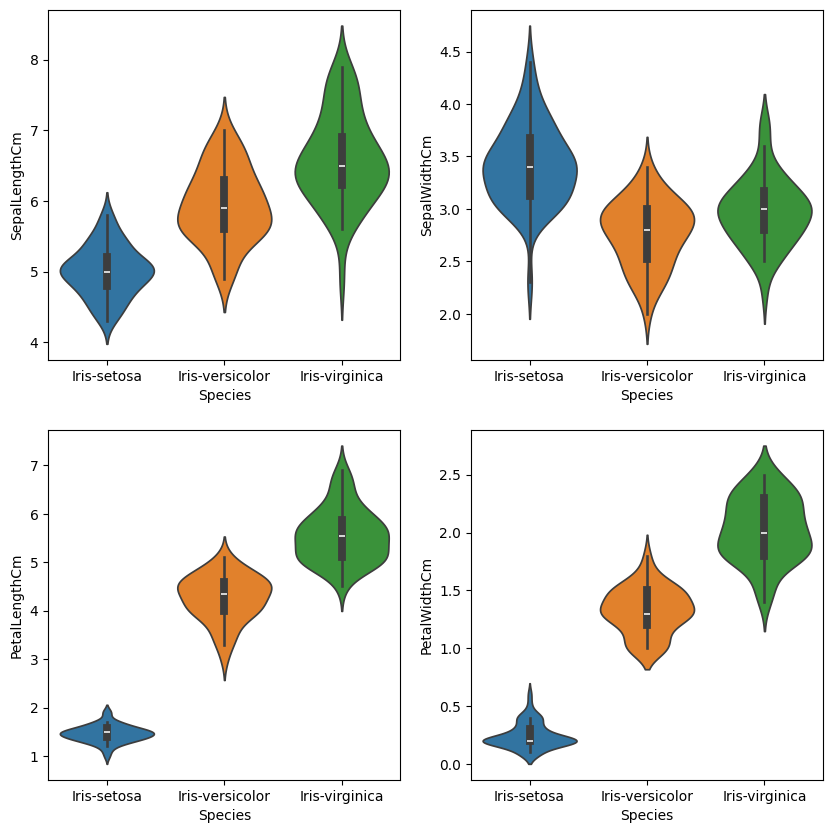

In [7]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(10, 10))
sns.violinplot(x="Species", y="SepalLengthCm", data=iris, ax=ax1, hue="Species")
sns.violinplot(x="Species", y="SepalWidthCm", data=iris, ax=ax2, hue="Species")
sns.violinplot(x="Species", y="PetalLengthCm", data=iris, ax=ax3, hue="Species")
sns.violinplot(x="Species", y="PetalWidthCm", data=iris, ax=ax4, hue="Species")

In [35]:
iris = pd.read_csv("./Iris.csv").drop(['Id'], axis=1)
X = np.array(iris.iloc[:,0:4])
y = np.array(pd.factorize(iris['Species'])[0])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply fuzzy c-means clustering to determine fuzzy membership
cntr, u_train, _, _, _, _, _ = fuzz.cluster.cmeans(X_train.T, c=len(np.unique(y)), m=2, error=0.005, maxiter=1000)

# Calculate the fuzzy membership values for the testing set
u_test, _, _, _, _, _ = fuzz.cluster.cmeans_predict(X_test.T, cntr_trained=cntr, m=3, error=0.005, maxiter=1000)

# Create a new dataset with fuzzy membership values as features
X_train_fuzzy = np.hstack((X_train, u_train.T))
X_test_fuzzy = np.hstack((X_test, u_test.T))

# Train a neural network classifier
print('\n-------NO FUZZY VALUES-------')
classification = MLPClassifier(hidden_layer_sizes=(10,), activation="relu", max_iter=1000, random_state=42)
classification.fit(X_train, y_train)

y_start_train_pred = classification.predict(X_train)
metrics.get_metrics('Train',y_train, y_start_train_pred)

y_start_test_pred = classification.predict(X_test)
metrics.get_metrics('Test',y_test, y_start_test_pred)


print('\n-------WITH FUZZY VALUES-------')
fuzzy_classification = MLPClassifier(hidden_layer_sizes=(10,), activation="relu", max_iter=1000, random_state=42)
fuzzy_classification.fit(X_train_fuzzy, y_train)

y_train_pred = fuzzy_classification.predict(X_train_fuzzy)
metrics.get_metrics('Train with fuzzy',y_train, y_train_pred)

y_test_pred = fuzzy_classification.predict(X_test_fuzzy)
metrics.get_metrics('Test with fuzzy',y_test, y_test_pred)


-------NO FUZZY VALUES-------

Train prediction accuracy: 0.9833333333333333
Train precision score: 0.9841463414634146
Train recall score: 0.9833333333333333
Train F1 score: 0.9833333333333333
Train confusion matrix:
[[40  0  0]
 [ 0 39  2]
 [ 0  0 39]]

Test prediction accuracy: 0.9666666666666667
Test precision score: 0.9694444444444444
Test recall score: 0.9666666666666667
Test F1 score: 0.9664109121909632
Test confusion matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]

-------WITH FUZZY VALUES-------

Train with fuzzy prediction accuracy: 0.975
Train with fuzzy precision score: 0.9752083333333332
Train with fuzzy recall score: 0.975
Train with fuzzy F1 score: 0.975003906860447
Train with fuzzy confusion matrix:
[[40  0  0]
 [ 0 39  2]
 [ 0  1 38]]

Test with fuzzy prediction accuracy: 1.0
Test with fuzzy precision score: 1.0
Test with fuzzy recall score: 1.0
Test with fuzzy F1 score: 1.0
Test with fuzzy confusion matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


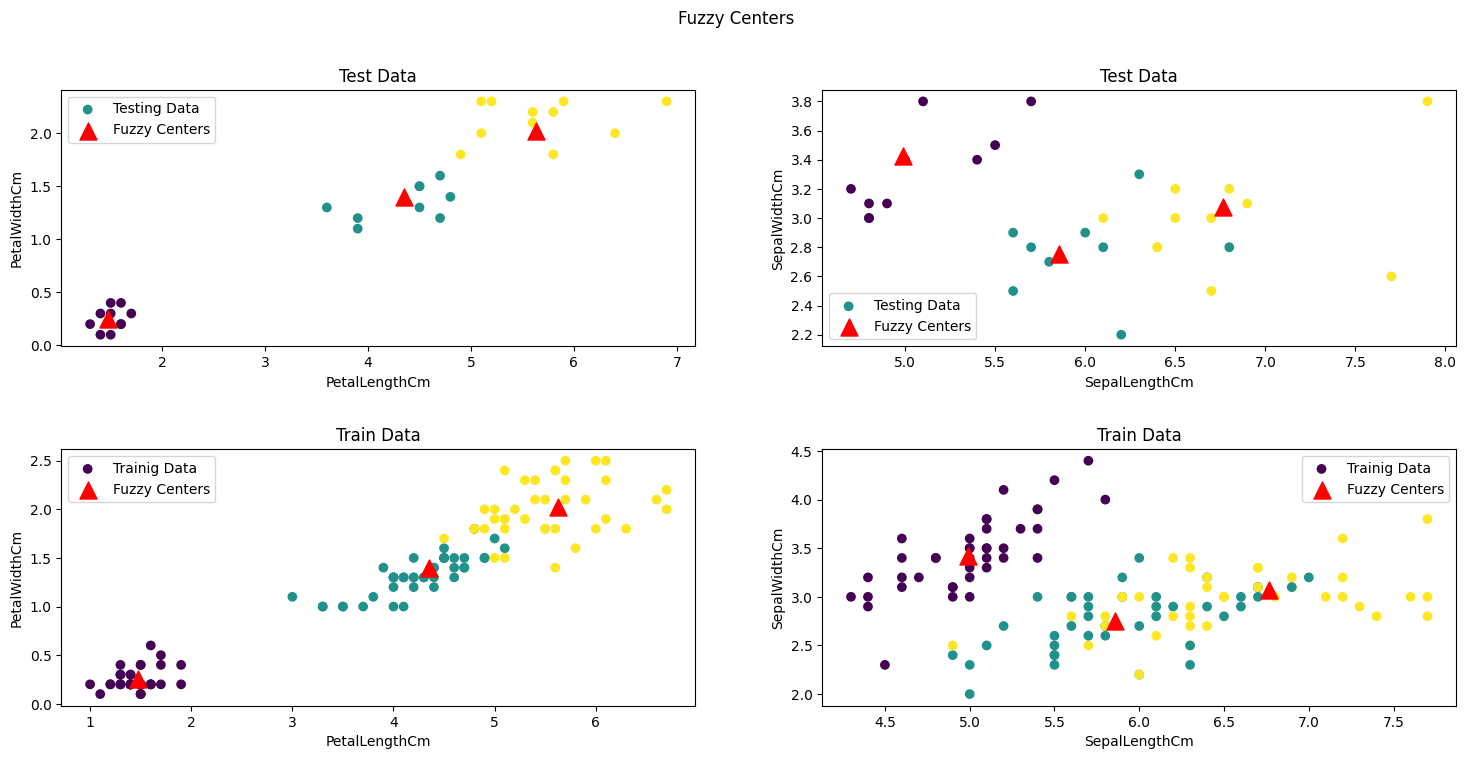

In [9]:
fig, axs = plt.subplots(2,2)
fig.subplots_adjust( wspace=0.2, hspace=0.4)
fig.set_figheight(8)
fig.set_figwidth(18)
fig.suptitle('Fuzzy Centers')
axs[0,0].set_title('Test Data')
axs[0,0].set(xlabel='PetalLengthCm',ylabel='PetalWidthCm')
axs[0,0].scatter(x=X_test[:, 2], y=X_test[:, 3], c=y_test, cmap='viridis', marker='o', label='Testing Data')
axs[0,0].scatter(cntr[:, 2], cntr[:, 3], c='red', marker='^', s=150, label='Fuzzy Centers',)
axs[0,0].legend()


axs[0,1].set_title('Test Data')
axs[0,1].set(xlabel='SepalLengthCm',ylabel='SepalWidthCm')
axs[0,1].scatter(x=X_test[:, 0], y=X_test[:, 1], c=y_test, cmap='viridis', marker='o', label='Testing Data')
axs[0,1].scatter(cntr[:, 0], cntr[:, 1], c='red', marker='^', s=150, label='Fuzzy Centers',)
axs[0,1].legend()

axs[1,0].set_title('Train Data')
axs[1,0].set(xlabel='PetalLengthCm',ylabel='PetalWidthCm')
axs[1,0].scatter(X_train[:, 2], X_train[:, 3], c=y_train, cmap='viridis', marker='o', label='Trainig Data')
axs[1,0].scatter(cntr[:, 2], cntr[:, 3], c='red', marker='^', s=150, label='Fuzzy Centers',)
axs[1,0].legend()

axs[1,1].set_title('Train Data')
axs[1,1].set(xlabel='SepalLengthCm',ylabel='SepalWidthCm')
axs[1,1].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', marker='o', label='Trainig Data')
axs[1,1].scatter(cntr[:, 0], cntr[:, 1], c='red', marker='^', s=150, label='Fuzzy Centers',)
axs[1,1].legend()